# Crush just enough Python

This is a brief introduction to programming in Python to help you hit the ground running with the CFD step-by-step.

**Installation**: Download and install a Python distribution on your computer. One option is the free [Anaconda Scientific Python](https://www.anaconda.com/download) distribution. Choose *Miniconda* if your computer is running out of storage.

Here are some suggestions:
- For best results, prepare your own code for every class, either as a Python script or in a clean Jupyter notebook.
- To write and execute Python code, I recommend using Visual Studio Code.
- For easy management of various Python environment, I recommend creating an isolated environment for this course. Open Anaconda Prompt and type the following command:
```Prompt
conda create --name cfd2025 python=3.12
```

## Libraries

Python is a high-level, interpreted language that supports procedural, functional and object-oriented programming.

- Python is inhabited by many `packages` or `libraries` that provide useful things like *array operations*, *plotting*, and much more.

- We can `import` libraries of functions to expand the capabilities of Python in our programs.

Let's start by importing a few libraries to help us out.

- `NumPy`: providing a bunch of useful array operations (similar to MATLAB).

- `Matplotlib`: a 2D plotting library which we will use to visualize our results.

Before the actual import, it is necessary to install the corresponding libraries. Type the following command to install `Matplotlib` and its dependencies:

```Prompt
conda install matplotlib
```

```{note}
If you are a proficient MATLAB user, there is a wiki page that should prove helpful to you: [NumPy for Matlab Users](http://wiki.scipy.org/NumPy_for_Matlab_Users).
```

## Import and use libraries

Standing on the shoulders of giants. The following code will be at the top of most of our programs, so execute the code in this cell first!

In [1]:
# <-- comments in Python are denoted by the pound sign, like this one
import numpy                            # we import the array library
from matplotlib import pyplot           # import plotting library

We are importing one library named `numpy` and we are importing a module called `pyplot` of a big library called `matplotlib`.

To use a function belonging to one of these libraries, we have to tell Python where to look for it. For that, each function name is written following the library name, with a **dot** in between.

So if we want to use the NumPy function [linspace()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), we call it by writing:

In [2]:
myarray = numpy.linspace(0, 5, 6)

We can visualize the resulting array by printing it:

In [3]:
print(myarray)

[0. 1. 2. 3. 4. 5.]


```{admonition} Exercise
The function `linspace()` is very useful. Try to change the input parameters and observe the different outputs. What are the meanings of the three input parameters?
```

## Import styles

You will often see code snippets that use the following lines

In [4]:
import numpy as np
from matplotlib import pyplot as plt

**Question**: What's all of this import-as business?

*It's a way of creating `shortcuts` to the NumPy library and the pyplot module. You will see them frequently as it is in common usage.*

```{note}
Sometimes, you'll see people importing a whole library without assigning a shortcut for it (like `from numpy import *`). This way is **NOT** recommended.
```

## Variables

Python does not require explicitly declared variable types like some compiled languages, such as C.

In [5]:
a = 5                                   # a is an integer 5
b = 'five'                              # b is a string of the word 'five'
c = 5.0                                 # c is a floating point 5

In [6]:
print(type(a), type(b), type(c))

<class 'int'> <class 'str'> <class 'float'>


```{warning}
If you divide an integer by an integer that yields a *remainder*, the result will be converted to a *float*. (This is different from the behavior in Python 2.7!)
```

## Loops in Python

Python uses `indents` and `whitespace` to group statements together.

To write a short loop in C, you might use:
```C
for (i = 0, i < 5, i++){
    printf("Hi! \n");
}
```

Python does not use curly braces like C, so the same program as above is written in Python as follows:
```Python
for i in range(5):
    print('Hi!')
```

```{admonition} Exercise
Write a Python program that calculates the sum of integers from 1 to 10 and print the result. Note the use of the `range()` function.
```

If you have nested for-loops, there is a further indent for the inner loop.

In [7]:
for i in range(3):
    for j in range(3):
        pass    # do nothing
    
    # This statement is within the i-loop, but not the j-loop

## Slicing arrays

In `NumPy`, you can look at portions of arrays in the same way as in MATLAB. Let's take an array of values from 1 to 5.

In [8]:
myvals = numpy.array([1, 2, 3, 4, 5])
print(myvals)

[1 2 3 4 5]


Python uses a **zero-based** index, so let's look at the *first* and *last* element in the array `myvals`.

In [9]:
print(myvals[0], myvals[4])

1 5


There are 5 elements in the array `myvals`, but if we try to look at `myvals[5]`, Python will throw an error, as `myvals[5]` is actually calling the non-existant 6th element of the array.

In [10]:
print(myvals[5])

IndexError: index 5 is out of bounds for axis 0 with size 5

Arrays can also be sliced, grabbing a range of values. Let's look at the first three elements.

In [11]:
print(myvals[0:3])

[1 2 3]


```{note}
Slicing is *inclusive* on the left and *exclusive* on the right, so the above command gives us the values of `myvals[0]`, `myvals[1]` and `myvals[2]`, but not `myvals[3]`.
```

## Assigning array variables

One of the strange little features in Python that often confuses people comes up when assigning and comparing arrays of values. Here is a quick example. Let us start by defining a 1D array called $a$:

In [12]:
a = numpy.linspace(1, 5, 5)
print(a)

[1. 2. 3. 4. 5.]


OK, so we have an array $a$, with the values 1 to 5. If we want to make a copy of that array, called $b$, we may try the following:

In [13]:
b = a
print(b)

[1. 2. 3. 4. 5.]


Great! So $a$ has the values 1 to 5 and now so does $b$. Now we have a backup of $a$, we can change its values without worrying about losing data (or so we may think!).

In [14]:
a[2] = 17
print(a)

[ 1.  2. 17.  4.  5.]


Here, the 3rd element of $a$ has been changed to 17. Now let's check on $b$.

In [15]:
print(b)

[ 1.  2. 17.  4.  5.]


```{note}
When you use a statement like $b = a$, rather than copying all the values of $a$ into a new array called $b$, Python just creates an `alias` (or a pointer) called $b$ and tells it to route us to $a$. So if we change a value in $a$, then $b$ will reflect that change (technically, this is called *assignment by reference*). This default behavior may result in a more efficient code and potentially saves memory, but can also lead to hidden errors that are difficult to debug!
```

If you want to make a true copy of the array, you have to tell Python *explicitly* to copy every element of $a$ into a new array. Let us call it $c$.

In [16]:
c = a.copy()
print(c)

[ 1.  2. 17.  4.  5.]


Now, we can try again to change a value in $a$ and see if the changes are also seen in $c$.

In [17]:
a[2] = 3
print(a)
print(c)

[1. 2. 3. 4. 5.]
[ 1.  2. 17.  4.  5.]


## Array operations with NumPy

For more computationally intensive programs, the use of built-in `NumPy` functions can provide an increase in execution speed many-times over. As a simple example, consider the following equation:

$$u^{n+1}_i = u^n_i-u^n_{i-1}$$

Now, given a vector $u^n = [0, 1, 2, 3, 4, 5]$ we can calculate the values of $u^{n+1}$ by iterating over the values of $u^n$ with a for loop.

In [4]:
un = numpy.array([0, 1, 2, 3, 4, 5])

for i in range(1, len(un)):
    print(un[i] - un[i-1])

1
1
1
1
1


This is the expected result and the execution time was very short. If we perform the same operation as an array operation, then rather than calculate $u^n_i-u^n_{i-1}\ $ 5 separate times, we can `slice` the $u$ array and calculate each operation with one command:

In [5]:
un[1:] - un[0:-1]

array([1, 1, 1, 1, 1])

What this command says is subtract the 0th, 1st, 2nd, 3rd, 4th and 5th elements of $u$ from the 1st, 2nd, 3rd, 4th, 5th and 6th elements of $u^n$.

**Question**: If we can use raw Python (for-loop) to conduct the calculations, why do we still need array operation?

## Speed comparison

For a 6-element array, the benefits of array operations are pretty slim. There will be no appreciable difference in execution time because there are so few calculations taking place.

Therefore, we need to make a larger array to test the calculation speed. The iPython **magic** function `%%timeit` will help us evaluate the performance of our code. 

```{note}
The `%%timeit` magic function will run the code multiple times and then give an average execution time as a result.
The execution times below will vary from machine to machine. Don't expect your times to match these results, but you *should* expect to see the same general trend in decreasing execution time as we switch to array operations.
```

In [7]:
%%timeit
un = numpy.arange(1000000)

for i in range(1, len(un)):
    diff = un[i] - un[i-1]

526 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Let's compare that with the performance of the same code implemented with array operations:

In [8]:
%%timeit
diff = un[1:] - un[0:-1]

2.44 μs ± 174 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


As you can see, the speed difference is **huge**! Several handreds of miliseconds is not a huge amount of time to wait, but these speed gains will increase exponentially with the size and complexity of the problem being evaluated.

## Defining functions in Python

Next, we are going to introduce *function definitions*, which will allow us more flexibility in reusing and also in organizing our code.

We will begin with a trivial example: a function which adds two numbers. To create a function in Python, we start with the following:

```Python
def simpleadd(a, b):
```

This statement creates a function called `simpleadd` which takes two inputs, $a$ and $b$. Let us execute this function definition code.

In [22]:
def simpleadd(a, b):
    return a + b

The `return` statement tells Python what data to return in response to being called.  Now we can try calling our `simpleadd` function:

In [23]:
simpleadd(3, 4)

7

Of course, there can be much more happening between the `def` line and the `return` line. In this way, one can build code in a *modular* way.

```{admonition} Exercise
Write a function named `fibonacci` that returns the n-th (zero-indexed) number in the Fibonacci sequence. Print the 7-th number (13) by calling the function.
```

Once defined, the function `fibonacci` can be called like any of the built-in Python functions that we have already used. For exmaple, we might want to print the first 10 numbers in the Fibonacci sequence:

In [ ]:
for n in range(10):
    print(fibonacci(n))

We will use the capability of defining our own functions in Python to help us build codes that are easier to *reuse*, easier to *maintain*, easier to *share*!

## Basic plotting

On a system with `Matplotlib` installed, we can import the `pyplot` module for plotting all kinds of figures to visualize our data.

In [25]:
from matplotlib import pyplot as plt

The simplest (x, y) line plot is achieved by calling `plt.plot()` with two iterable objects of the same length (typically lists of numbers or `NumPy` arrays). For example,

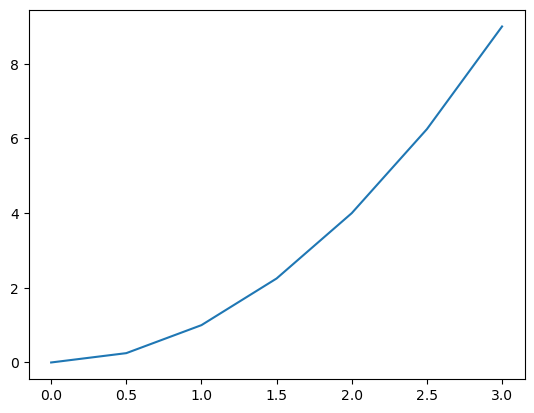

In [26]:
plt.figure()
x = [0., 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y = [0.0, 0.25, 1.0, 2.25, 4.0, 6.25, 9.0]
plt.plot(x,y)
plt.show()

To plot (x, y) points as a *scatter* plot rather than as a *line* plot, call `plt.scatter()` instead:

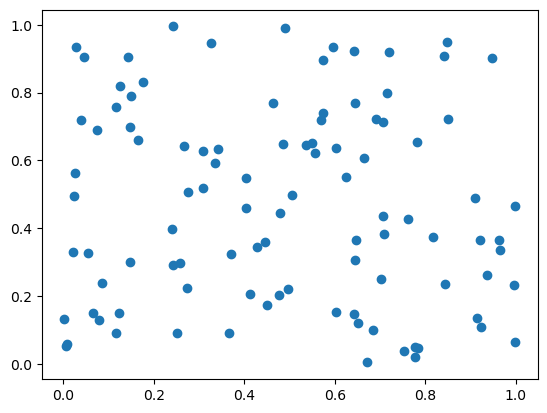

In [27]:
import random

x, y = [], []
for i in range(100):
    x.append(random.random())
    y.append(random.random())

plt.figure()
plt.scatter(x, y)
plt.show()

## Homework 1

Learn more about the Python language. Get yourself familiar with the following contents:

- Data types (integer, float, string, etc)
- Data container (tuple, list, dictionary, etc)
- Conditions and loops
- Array operation using NumPy
- Plotting figures using Matplotlib (size, labels, legends, formats, subplots, contours, etc)

**Let us code and have fun!!!**